# B-dot pair analysis

This code analyses pairs of Bdots to find the magnetic field. It is quite simple - the code:
* Loads the raw data from the scopes
* Truncates the data to avoid integrating over too much noise
* Calibrates the voltages to dB/dt based on scope attenuations and probe diameters
* Sums and subtracts the pairs to find the electrostatic and dB/dt contributions
* Integrates dB/dt to give the magnetic field

To get started, run the code in the cell below:

In [11]:
%matplotlib notebook
from SourceCode.Bdots import *

Next, add details from the lab book, such as the shot number, which pairs were attached to which channels, what the scope attenuations were, and specify the diameter of each Bdot pair. The diameter is in mm.

In [12]:
shot="s0202_15"
pairs={"T10":"D"}
attenuations={"D1":2, "D2":2}
diameters={"T10":1} #diameter in mm

This next cell creates an object ('b') which knows about all of the bdots you've specified above. It automatically truncates the data, calibrates and integrates using default values. Often, you need to alter the 'threshold', which is the signal at which the integration begins. If you find your integration begins too late, consider a lower value. For very noisy data, this will fail.

In [13]:
b=Bdots(shot=shot, pairs=pairs, attenuations=attenuations, diameters=diameters, threshold=1)

Now you have 'b', you can get it to plot data using the plot() command. plot() wants two keywords - the name of the pair, and the data set you want. Name is something like "G12", and data set can be:
* "raw" - the raw signals from the scopes
* "tr" - the signals after truncation and calibration
* "E&B" - the sum and difference of the two signals, or electrostatic and dB/dt contributions
* "B" - the integrated B field.

<IPython.core.display.Javascript object>


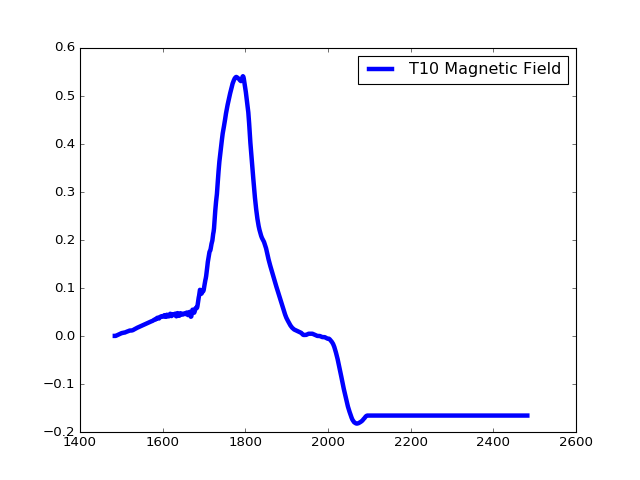

In [14]:
b.plot("T10", "B", flip=1)

These plots often look quite ugly. We can customise the plot easily using standard python commands. There's an example in the cell below, and hopefully it's obvious how to change the title and axes labels.

<IPython.core.display.Javascript object>


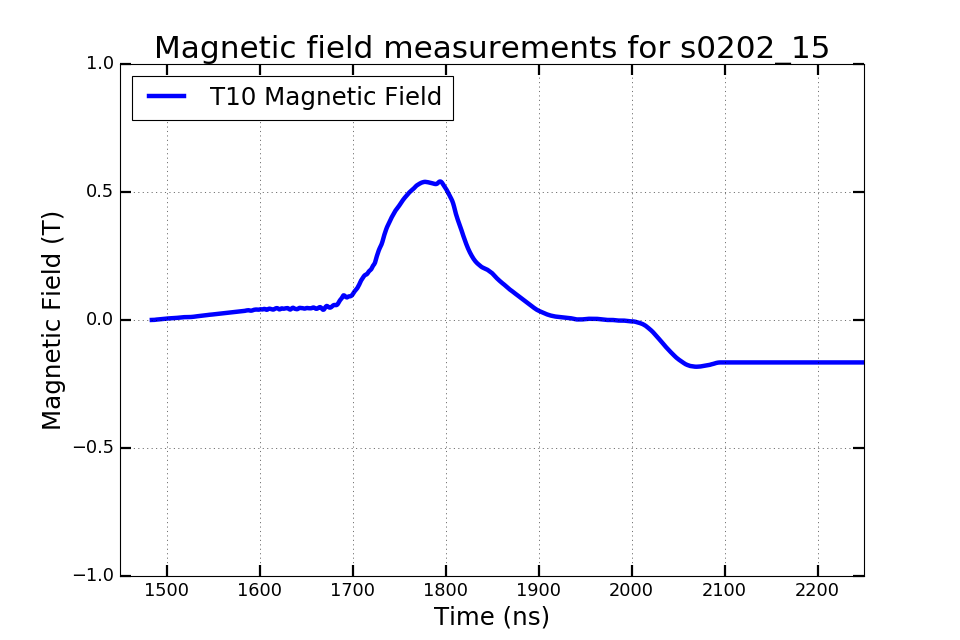

In [10]:
fig, ax=plt.subplots(figsize=(12,8)) #create a figure an attach a set of axes, ax, to it. All the plots will be on ax.
b.plot("T10", "B", ax=ax) #plot the Bdot pair

ax.set_ylim([-1,1]) #set the y scale
ax.set_xlim([1450,2250]) #set the x scale
ax.set_title("Magnetic field measurements for "+b.shot, fontsize=28)
ax.set_xlabel("Time (ns)", fontsize=22)
ax.set_ylabel("Magnetic Field (T)", fontsize=22)
ax.tick_params(labelsize=16, pad=5, length=10, width=2) #this sets the ticks and also the fontsize of the tick labels
ax.grid() #sets the background grid for easy viewing
ax.legend(fontsize=22, loc=2) #produces a legend.

In [6]:
r=Rogowskis(shot)
r.truncate(threshold=1.0,cal=[105*3e9,-103*3e9])
r.integrate(return_posts=8)

s0125B16: using Rog 1 only


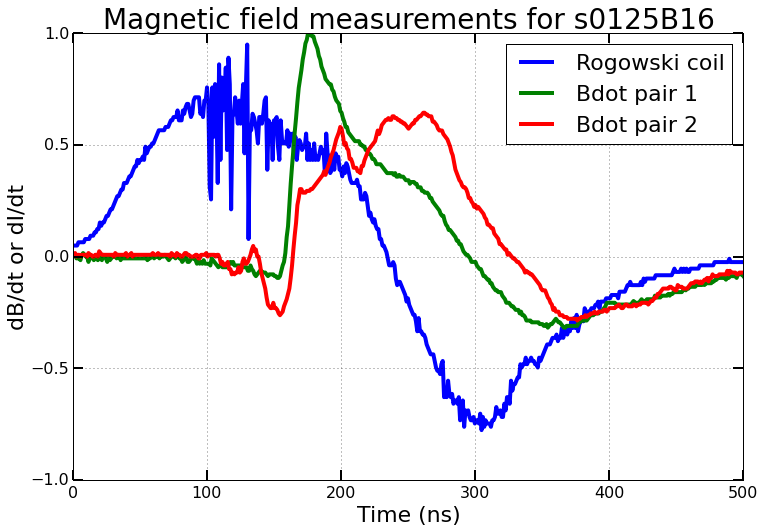

In [33]:
fig, ax=plt.subplots(figsize=(12,8)) #create a figure an attach a set of axes, ax, to it. All the plots will be on ax.

t0=r.t0

ax.plot(r.time-t0,r.bd1_tr/1e12, lw=4, label='Rogowski coil')
ax.plot(b.bd["T12"].time-t0, -b.bd["T12"].dBdt/1e8, lw=4, label='Bdot pair 1')
ax.plot(b.bd["T34"].time-t0, -b.bd["T34"].dBdt/1e8, lw=4, label='Bdot pair 2')

ax.set_ylim([-1,1]) #set the y scale
ax.set_xlim([0,500]) #set the x scale
ax.set_title("Magnetic field measurements for "+b.shot, fontsize=28)
ax.set_xlabel("Time (ns)", fontsize=22)
ax.set_ylabel("dB/dt or dI/dt", fontsize=22)
ax.tick_params(labelsize=16, pad=5, length=10, width=2) #this sets the ticks and also the fontsize of the tick labels
ax.grid() #sets the background grid for easy viewing
ax.legend(fontsize=22) #produces a legend.

In [34]:
fig.savefig("s0125B16 b field timings.png")